In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")
conn = engine.connect()

In [6]:
# reflect an existing database into ORM classes
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [7]:
#map measurement class
measurement = Base.classes.measurement

In [8]:
#map station classes
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)


In [10]:
# We can view all of the classes that automap found
inspector = inspect(engine)


In [11]:
#get list of column names and types of measurement class
measurement_columns = inspector.get_columns('measurement')
for c in measurement_columns:
    print(c['name'], c['type'])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
#get list of column names and types of station class
station_columns = inspector.get_columns('station')
for c in station_columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [13]:
data = pd.read_sql("select * from station",conn)
data

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [14]:
data = pd.read_sql("select * from measurement",conn)
data.sort_values(by=['date'],ascending=False)#sort data in descending order to query last 12 months

,id,station,date,prcp,tobs
19549,19550,USC00516128,2017-08-23,0.45,76.0
12186,12187,USC00519523,2017-08-23,0.08,82.0
2723,2724,USC00519397,2017-08-23,0.00,81.0
7634,7635,USC00514830,2017-08-23,0.00,82.0
12185,12186,USC00519523,2017-08-22,0.00,82.0
...,...,...,...,...,...
14959,14960,USC00511918,2010-01-01,0.05,66.0
12187,12188,USC00519281,2010-01-01,0.15,70.0
9518,9519,USC00519523,2010-01-01,0.15,75.0
9007,9008,USC00518838,2010-01-01,0.21,72.0


In [15]:
# Calculate the date 1 year ago from the last data point in the database
previous_year = dt.date(2017,8,23)-dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
precip= session.query(measurement.date,measurement.prcp).filter(measurement.date>=previous_year).\
        filter(measurement.prcp).all()
precip

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-28', 0.01),
 ('2016-08-31', 0.13),
 ('2016-09-04', 0.03),
 ('2016-09-07', 0.05),
 ('2016-09-09', 0.03),
 ('2016-09-11', 0.05),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-22', 0.02),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-10-17', 0.01),
 ('2016-10-21', 0.05),
 ('2016-10-22', 0.15),
 ('2016-10-23', 0.01),
 ('2016-10-25', 0.03),
 ('2016-10-30', 0.24),
 ('2016-10-31', 0.03),
 ('2016-11-08', 0.07),
 ('2016-11-19', 0.03),
 ('2016-11-20', 0.05),
 ('2016-11-21', 0.01),
 ('2016-11-22', 0.13),
 ('2016-11-23', 0.14),
 ('2016-11-24', 0.05),
 ('2016-11-25', 0.05),
 ('2016-11-26', 0.05),
 ('2016-11-28', 0.01),
 ('2016-11-30', 0.14),
 ('2016-12-01', 0.12),
 ('2016-12-02', 0.03),
 ('2016-12-04', 0.03),
 ('2016-12-05', 0.43),
 ('2016-12-06', 0.02),
 ('2016-12-08', 0.03),
 ('2016-12-09', 0.52),
 ('2016-12-10', 0.05),
 ('2016-12-11', 0.04),
 ('2016-12-

In [16]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df= pd.DataFrame(precip)
precip_df=precip_df.set_index('date')

In [17]:
# Sort the dataframe by date
precip_df=precip_df.sort_index(axis = 0) 
precip_df

,prcp
date,
2016-08-23,1.79
2016-08-23,0.70
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-21,0.02
2017-08-21,0.56
2017-08-22,0.50


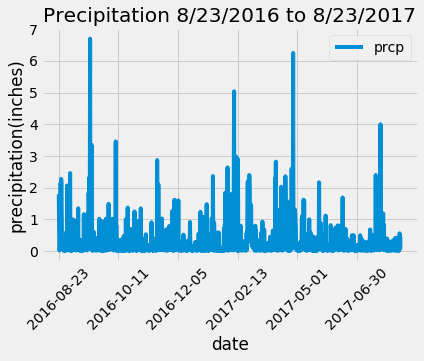

<Figure size 1440x720 with 0 Axes>

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(kind='line', stacked=True)
plt.title("Precipitation 8/23/2016 to 8/23/2017")
plt.xlabel('date')
plt.ylabel('precipitation(inches)')
plt.xticks(rotation=45)
plt.figure(figsize=(20,10))
plt.show()

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM 
#by creating multiple series and putting them together
mean = precip_df.mean()
median= precip_df.median()
variance = precip_df.var()
standard_deviation= precip_df.std()
stand_err_mean = precip_df.sem()
data_statistics={'Mean':mean,'Median':median,'Variance':variance,   
                       'Standard Deviation':standard_deviation,'SEM':stand_err_mean}
statistics_df = pd.DataFrame(data_statistics)
np.round(statistics_df, decimals=2)

,Mean,Median,Variance,Standard Deviation,SEM
prcp,0.31,0.1,0.33,0.58,0.02


In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,prcp
count,1147.000000
mean,0.312363
std,0.576781
min,0.010000
25%,0.030000
50%,0.100000
75%,0.310000
max,6.700000


In [21]:
# Design a query to show how many stations are available in this dataset?
stations=session.query(station).filter(station.id).count()
print(f'There are {stations} stations available in the dataset.')

There are 9 stations available in the dataset.


In [22]:
# What are the most active stations? (i.e. what stations have the most rows)?
stations_activity=session.query(measurement.station, func.count(measurement.station)).\
        group_by(measurement.station).\
        order_by(func.count(measurement.station).desc()).all()# List the stations and the counts in descending order.

In [23]:
top_active_stations=session.query(measurement.station).\
        group_by(measurement.station).\
        order_by(func.count(measurement.station).desc()).all()
print(f"The following are the most active stations:")
top_active_stations

The following are the most active stations:


[('USC00519281'),
 ('USC00519397'),
 ('USC00513117'),
 ('USC00519523'),
 ('USC00516128'),
 ('USC00514830'),
 ('USC00511918'),
 ('USC00517948'),
 ('USC00518838')]

In [24]:
top= [x[0] for x in top_active_stations][0]
top
print(f"The most active station is {top}.")

The most active station is USC00519281.


In [25]:
previous_year = dt.date(2017,8,23)-dt.timedelta(days=365)
top_station= session.query(measurement.date,measurement.tobs).filter(measurement.date>=previous_year).\
        filter(measurement.prcp).\
        filter(measurement.station==top).\
        order_by(measurement.tobs.desc()).all()
print(f"The following are the temps for station {top}:")
top_station

The following are the temps for station USC00519281:


[('2017-07-23', 82.0),
 ('2017-07-29', 82.0),
 ('2017-08-05', 82.0),
 ('2017-03-11', 81.0),
 ('2017-07-02', 81.0),
 ('2017-07-28', 81.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-08', 80.0),
 ('2016-09-11', 80.0),
 ('2016-09-27', 80.0),
 ('2017-05-28', 80.0),
 ('2017-07-15', 80.0),
 ('2017-07-16', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-13', 79.0),
 ('2016-09-15', 79.0),
 ('2016-09-17', 79.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-05', 79.0),
 ('2016-10-12', 79.0),
 ('2017-06-17', 79.0),
 ('2017-07-01', 79.0),
 ('2017-08-18', 79.0),
 ('2016-08-29', 78.0),
 ('2016-08-31', 78.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-16', 78.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-23', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-18', 78.0),
 ('2016-10-19', 78.0),
 ('2017-04-

In [26]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
lowest_temp=session.query(func.min(measurement.tobs)).filter(measurement.station==top).all()
print(f"The lowest temperation for station {top} is {lowest_temp}.")

The lowest temperation for station USC00519281 is [(54.0,)].


In [27]:
# highest temperature recorded 
highest_temp=session.query(func.max(measurement.tobs)).filter(measurement.station==top).all()
print(f"The highest temperation for station {top} is {highest_temp}.")

The highest temperation for station USC00519281 is [(85.0,)].


In [28]:
#average temperature of the most active station
avg_temp=session.query(func.avg(measurement.tobs)).filter(measurement.station==top).all()
print(f"The highest temperation for station {top} is {np.round(avg_temp, decimals =2)}.")

The highest temperation for station USC00519281 is [[71.66]].


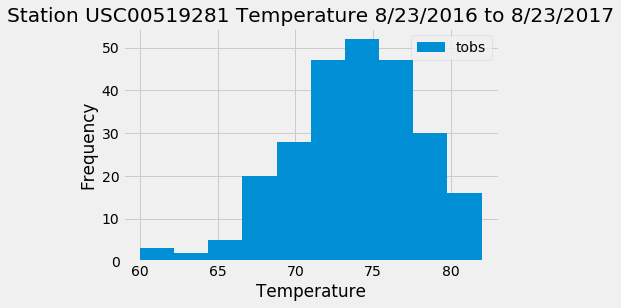

<Figure size 1440x720 with 0 Axes>

In [29]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
top_station_df=pd.DataFrame(top_station)
top_station_df.plot(kind='hist', stacked=True)
plt.title(f"Station {top} Temperature 8/23/2016 to 8/23/2017")
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.figure(figsize=(20,10))
plt.show()